# "Audible - Exploratory Data Analysis"

> "Exploring the audible dataset and understanding the relationship between the features of the data."

- toc:true
- comments:true
- categories:[audible,data_analysis,data_visulization,tabular_data,matplotlib,seaborn]
- images: images/eda.png

#### Importing Libraries

While cleaning we have already imported [Numpy](https://numpy.org/doc/stable/user/index.html) and [Pandas](https://pandas.pydata.org/docs/getting_started/index.html). **Pandas** and **Numpy** are essential for analysing the data. If you want to view the notebook where I cleaned the data, please [click here]().
<br>
We additionaly import :
- [Matplotlib](https://matplotlib.org/stable/users/getting_started/), which will help us in creating data visualiation. 
- [Seaborn](https://seaborn.pydata.org/index.html), which is built on top of **matplotlib** with a quick & easy API for data plots & a thrid-party library 
- [adjustText](https://adjusttext.readthedocs.io/en/latest) which will help us in labelling our plots.
- We also import `matplotlib.ticker` which helps us generate the minor ticks in our plots.

> Important: If you get a `Module not found error` un-comment the below cell.

In [1]:
# !pip install numpy pandas matplotlib seaborn adjustText

In [2]:
#collapse
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# helps with arranging the texts in our plot
from adjustText import adjust_text

# helps with minor ticks in the plots
from matplotlib.ticker import MultipleLocator 

import warnings
warnings.filterwarnings('ignore')

#### Setting a few parameters for matplotlib

In [3]:
#collapse
mpl.rcParams['axes.facecolor'] = '#222222' # helps with the background color

# removes the axes of all the plots, makes it visually aesthetic
mpl.rcParams['axes.spines.right'] = False 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.bottom'] = False

# changing the tick sizes for better viewing
plt.rcParams['xtick.labelsize']=12 
plt.rcParams['ytick.labelsize']=12

# Changing to Heiti font as we have Chinese fonts
mpl.rcParams['font.family'] = ['Heiti TC']

#### Reading the cleaned data

In [4]:
df = pd.read_csv('./audible_cleaned.csv')
df.head(3)

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.0,41.0
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.0,38.0


## Basic exploration

While we know the shape of our dataset and the fact that we have removed all duplicate values, all null values in the [Audible - Cleaner notebook]() but generally it's a great start working with any dataset to check for them. 

In [5]:
print(f'Null values in the dataset: {df.isna().sum().sum()}')
print('-' * 30)
print(f'Duplicate values in the dataset: {df.duplicated().sum()}')
print('-' * 30)
print(f'Shape of our dataset: {df.shape}')

Null values in the dataset: 0
------------------------------
Duplicate values in the dataset: 0
------------------------------
Shape of our dataset: (87489, 9)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         87489 non-null  object 
 1   author       87489 non-null  object 
 2   narrator     87489 non-null  object 
 3   time         87489 non-null  int64  
 4   releasedate  87489 non-null  object 
 5   language     87489 non-null  object 
 6   stars        87489 non-null  float64
 7   price        87489 non-null  float64
 8   ratings      87489 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


Runninng the built-in method `info()` in Pandas, we can come to a few conclusion about our data. We have:
- 3 columns of datatype `float64` 
- 1 column of datatype `int64`
- 5 columns of datatype `object`

> **Note**: We would need to convert the `releasedate` to a `datetime` object as that would give us much more detailed view on understanding our data.

In [7]:
df.describe().T.style.bar(subset='mean', color='crimson').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
time,87489.000000,417.497663,364.559399,1.000000,142.000000,386.000000,584.000000,8595.000000
stars,87489.000000,0.767811,1.709640,0.000000,0.000000,0.000000,0.000000,5.000000
price,87489.000000,559.009246,336.096642,0.000000,268.000000,585.000000,755.000000,7198.000000
ratings,87489.000000,3.723371,86.499601,0.000000,0.000000,0.000000,0.000000,12573.000000


**Quite a few steps. Let's break them down**.

1. Pandas comes with a basic data analysis method `describe()` that gives us information on *mean, std(standard deviation), minimum, maximum, 25 percentile, 50 percentile* & *75 percentile*.
2. The `.T` simply transposes the dataframe.
3. `.style.bar` is a way to highlight subsets in the dataframe. Here, we select the `mean` and compare it with the `50 percentile` to see how our data is distributed.

**Insights**:

- We see that our mean for the `time` column is higher than the `50%` meaning our data may be right skewed.
- While the `price` column looks like well balanced with heavy outliers.


## In-depth exploration

The goal here is to dive into our dataset looking at the the data trends, distribution , outliers and view comparison between the columns, creating informative & aesthetic data visualization. 

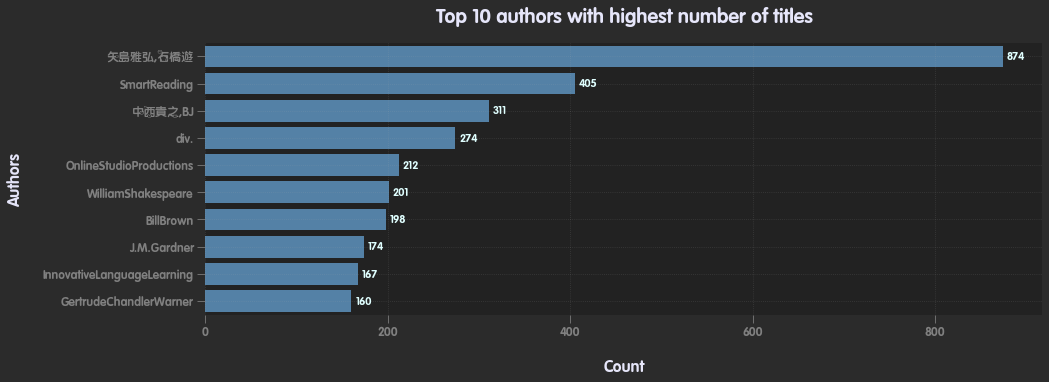

In [8]:
%matplotlib inline
author_titles = df.author.value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(15, 5), facecolor='#2b2b2b')

sns.barplot(x=author_titles.values, y=author_titles.index, orient='h', color='steelblue')
ax.bar_label(ax.containers[0], color='lightcyan', size=11, padding=4)

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Authors', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Top 10 authors with highest number of titles', color='lavender', fontsize=20, pad=20)

ax.grid(alpha=0.2, ls=':')
plt.show()

**Let's break down the code**.

- `%matplotlib inline` helps generate a matplotlib graph inside the Jupyter notebook
- `value_counts()` counts the number the unique values & `sort_values()` arrangeds the values in an ascending order. 
- Post that we create a figure & a single axes using `plt.subplots`. `figsize` takes a tuple of (width, height) and `facecolor` is the outer color of the plot.
- Then we use the **Seaborn** library to create a barplot.
- `ax.bar_label` allows us to add label to a bar plot. `ax.containers` represent an container object which holds the 10 values of the graph.*(Here, it's 10 objects)*
- `ax.tick_params` represents the ticks and the associated markers.
- `ax.set_xlabel` represents the label of x-axis. 
- `ax.set_title` represents the title of the plot.
- `ax.grid` represents the grid structure or the dotted lines in behind. `alpha` controls the opacity & `ls` the linestyle.
- `plt.show()` helps display the graph.

- `labelpad`,`padding`,`pad` controls the padding in between the label and respective object.

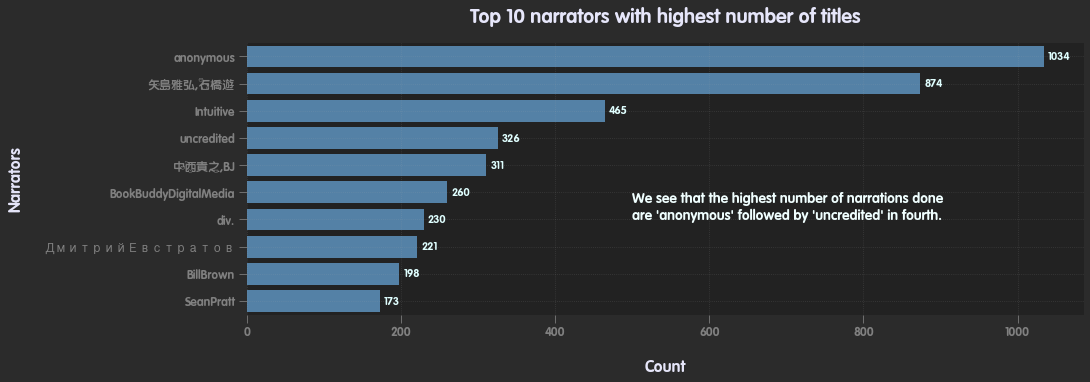

In [9]:
#collapse
%matplotlib inline
narrator_titles = df.narrator.value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(15, 5), facecolor='#2b2b2b')

sns.barplot(x=narrator_titles.values, y=narrator_titles.index, orient='h', color='steelblue')
ax.bar_label(ax.containers[0], color='lightcyan', size=11, padding=4)

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Narrators', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Top 10 narrators with highest number of titles', color='lavender', fontsize=20, pad=20)

ax.text(x=500, y=6, s="We see that the highest number of narrations done \nare 'anonymous' followed by 'uncredited' in fourth.",
        color='azure', size=14)


ax.grid(alpha=0.2, ls=':')
plt.show()

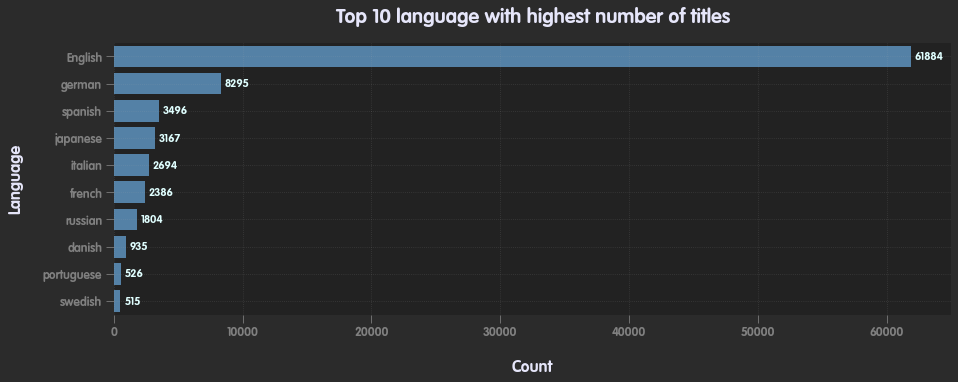

In [10]:
#collapse
%matplotlib inline
narrator_titles = df.language.value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(15, 5), facecolor='#2b2b2b')

sns.barplot(x=narrator_titles.values, y=narrator_titles.index, orient='h', color='steelblue')
ax.bar_label(ax.containers[0], color='lightcyan', size=11, padding=4)

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Language', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Top 10 language with highest number of titles', color='lavender', fontsize=20, pad=20)

ax.grid(alpha=0.2, ls=':')
plt.show()

#### Distribution of time

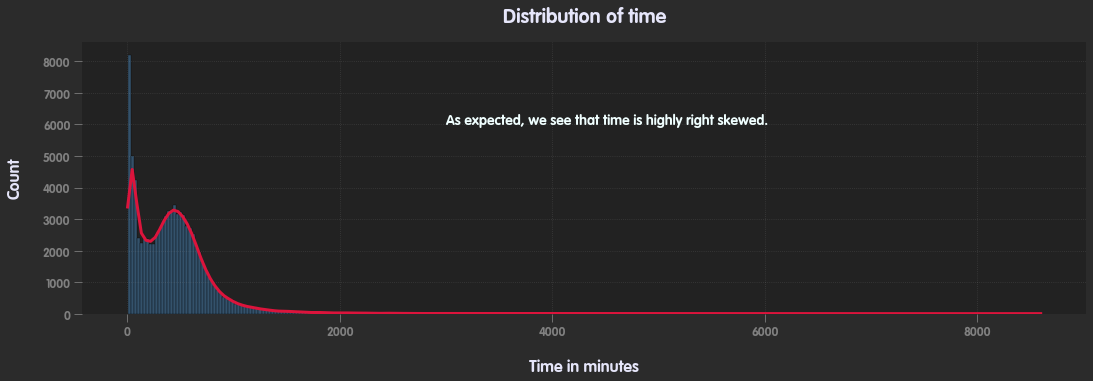

In [11]:
#collapse
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')

sns.histplot(df, x=df.time, kde=True, bins=300, color='steelblue', line_kws={'linewidth': 3})
ax.lines[0].set_color('crimson')

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Time in minutes', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Distribution of time', color='lavender', fontsize=20, pad=20)

ax.text(x=3000, y=6000, s="As expected, we see that time is highly right skewed.",
        color='azure', size=14)

ax.grid(alpha=0.2, ls=':')
plt.show()

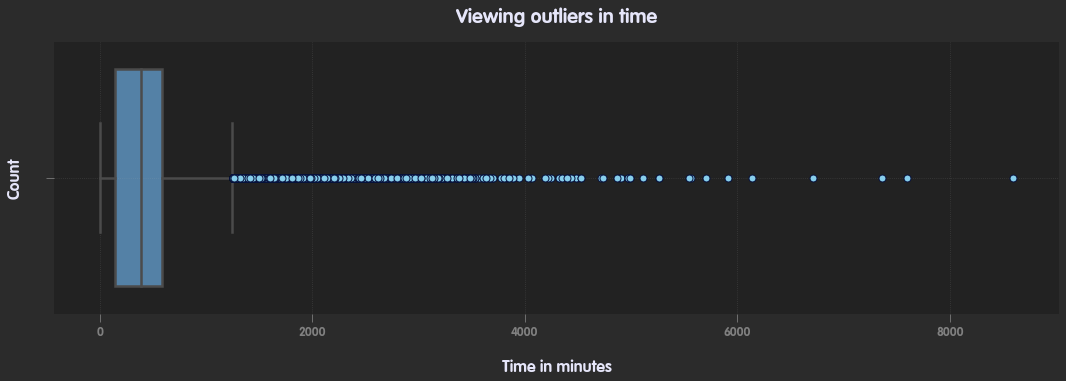

In [12]:
#collapse
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')

flierprops = dict(markerfacecolor='skyblue', markersize=7, marker = 'o', markeredgecolor='#06113C')
sns.boxplot(x=df.time, color='steelblue', flierprops=flierprops, linewidth=2.5,)


ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Time in minutes', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Viewing outliers in time', color='lavender', fontsize=20, pad=20)

ax.grid(alpha=0.2, ls=':')
plt.show()

#### Distribution of price

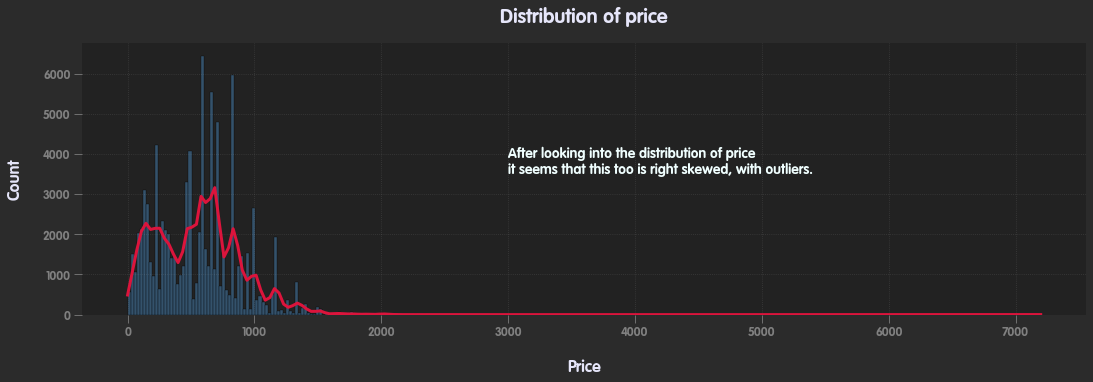

In [13]:
#collapse
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')

sns.histplot(df, x=df.price, kde=True, bins=300, color='steelblue', line_kws={'linewidth': 3})
ax.lines[0].set_color('crimson')

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Price', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Distribution of price', color='lavender', fontsize=20, pad=20)

ax.text(x=3000, y=3500, s="After looking into the distribution of price \nit seems that this too is right skewed, with outliers.",
        color='azure', size=14)

ax.grid(alpha=0.2, ls=':')
plt.show()

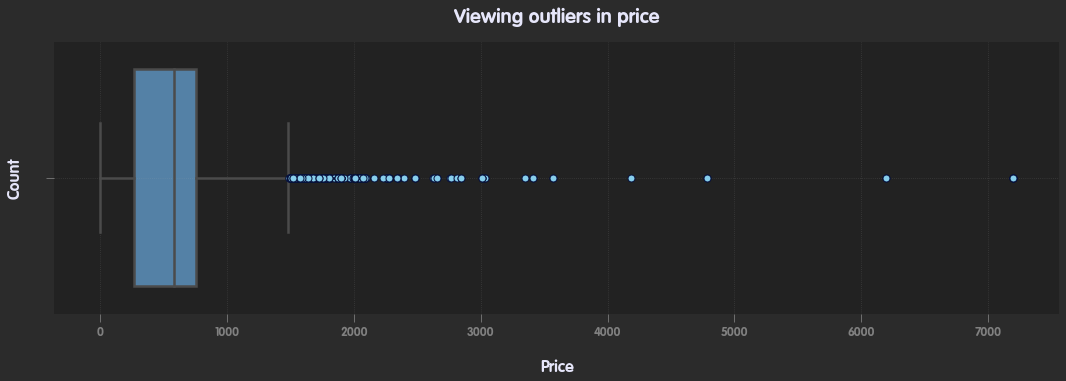

In [14]:
#collapse
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')

flierprops = dict(markerfacecolor='skyblue', markersize=7, marker = 'o', markeredgecolor='#06113C')
sns.boxplot(x=df.price, color='steelblue', flierprops=flierprops,linewidth=2.5)

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Price', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Viewing outliers in price', color='lavender', fontsize=20, pad=20)

ax.grid(alpha=0.2, ls=':')
plt.show()

#### Distribution of stars

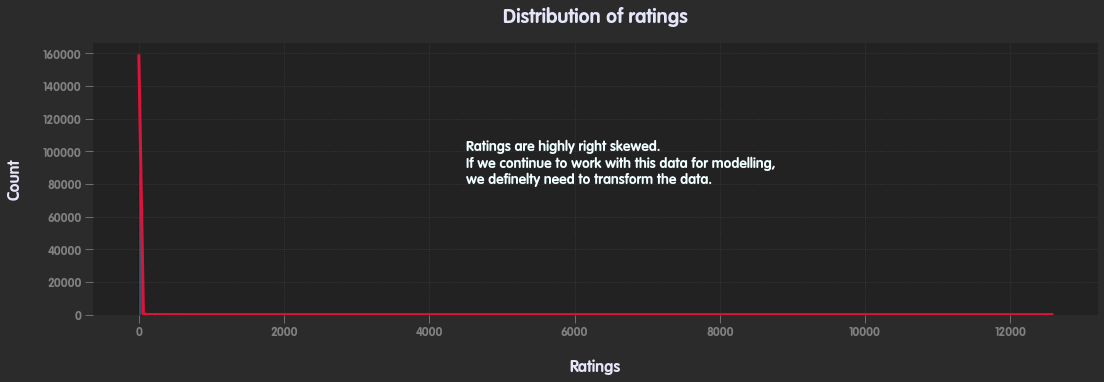

In [15]:
#collapse
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')

sns.histplot(df, x=df.ratings, kde=True, bins=300, color='steelblue', line_kws={'linewidth': 3})
ax.lines[0].set_color('crimson')

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Ratings', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Distribution of ratings', color='lavender', fontsize=20, pad=20)

ax.text(x=4500, y=80000, s="Ratings are highly right skewed. \nIf we continue to work with this data for modelling, \nwe definelty need to transform the data.",
        color='azure', size=14)

ax.grid(alpha=0.2, ls=':')
plt.show()

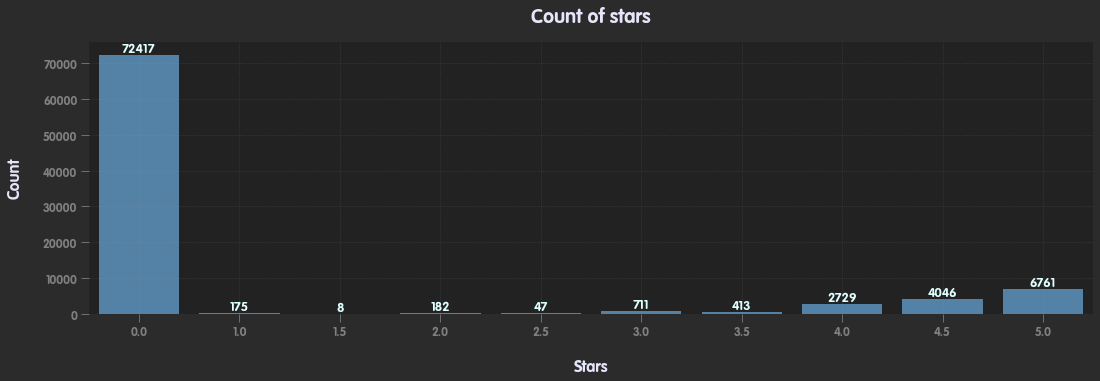

In [16]:
#collapse
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')

stars_count = df.stars.value_counts()

sns.barplot(x= stars_count.index, y=stars_count.values, color='steelblue',)
ax.bar_label(ax.containers[0], color='lightcyan', size=13, padding=0)

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Stars', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Count of stars', color='lavender', fontsize=20, pad=20)

ax.grid(alpha=0.2, ls=':')
plt.show()

#### Trend of released audiobooks by year

In [17]:
df.releasedate = pd.to_datetime(df.releasedate)
df['year'] = pd.DatetimeIndex(df['releasedate']).year

We use `pd.DatetimeIndex` to tap into the datetime object and extract the year using the attribute `year`

In [18]:
df.head(3)

,name,author,narrator,time,releasedate,language,stars,price,ratings,year
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.0,34.0,2008
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.0,41.0,2018
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.0,38.0,2020


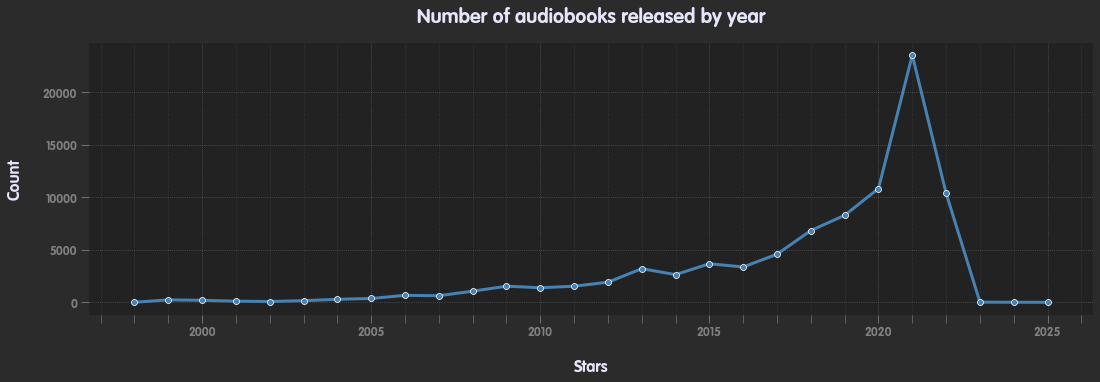

In [19]:
#collapse
yearly_books = df.year.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(18, 5), facecolor='#2b2b2b')
sns.lineplot(x= yearly_books.index, y=yearly_books.values, color='steelblue', linewidth=3, marker='o')

ax.tick_params(axis='x', which='both', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Stars', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Count', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Number of audiobooks released by year', color='lavender', fontsize=20, pad=20)
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.grid(alpha=0.4, ls=':', which='major')
ax.grid(alpha=0.1, ls='--', which='minor')
plt.show()


**Insights**:
- We see that the first audiobook was released as early as *1998*.
- Currently, we have data of pre-planned releases planned on *2025*.
- Looking at the trend, audiobooks started gaining popularity from *2003* hitting the highest on *2021* as of today(April 7, 2022)


#### Checking the relationship between ratings and price

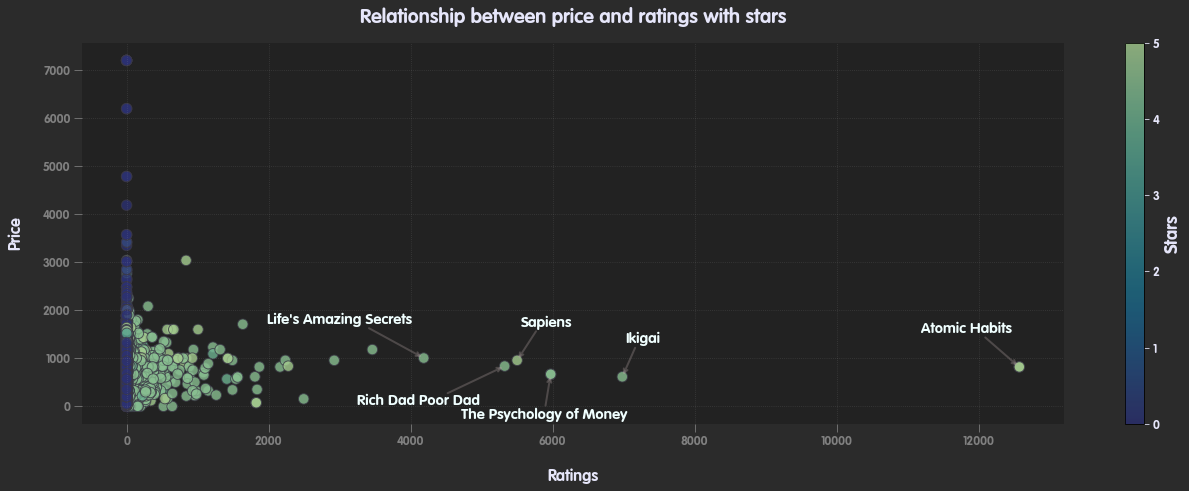

In [20]:
fig, ax = plt.subplots(figsize=(22, 7), facecolor='#2b2b2b')
sp = ax.scatter(x=df.ratings, y=df.price, c=df.stars, cmap='crest_r', edgecolor='#3A3845', s=110, alpha=0.8)

ax.tick_params(axis='x', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Ratings', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Price', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Relationship between price and ratings with stars', color='lavender', fontsize=20, pad=20)

texts= []
checker = []
for rating, amount, name in zip(df.ratings, df.price, df.name):
    if (rating) > 4000:
        if name not in checker:
            checker.append(name)
            texts.append(ax.text(rating, amount, name, fontdict=dict(color='azure', size=15)))

adjust_text(texts, force_points=0.5, force_text=3.5, expand_points=(1.2, 5.3), 
            expand_text=(0.9,0.9), autoalign=True,
            arrowprops=dict(arrowstyle = '->', alpha=0.3, lw=2, color='#B4A5A5',))


ax.grid(alpha=0.2, ls=':', which='major')

cb = plt.colorbar(sp)
cb.set_label('Stars', color='lavender', fontsize=18)
cb.ax.yaxis.set_tick_params(color='lavender', size=5)
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='lavender')

plt.show()

**Code**:
- `ax.scatter` is a creating a scatter plot, this is using matplotlib and not seaborn like before
- `adjust_text` is a library that helps you arrange text positions in matplotlib related plots. [Here's the docs.](https://adjusttext.readthedocs.io/en/latest)
- `plt.colorbar` generates the color bar on the right
- `setp` & `getp` sets and gets the property of an object respectively, here it's the **axes of the colorbar**

**Insights**:

- The higest ratings of a audiobook till date is for *Atomic Habits* with 1,25,690

#### Relationship between year and lenght of audiobooks

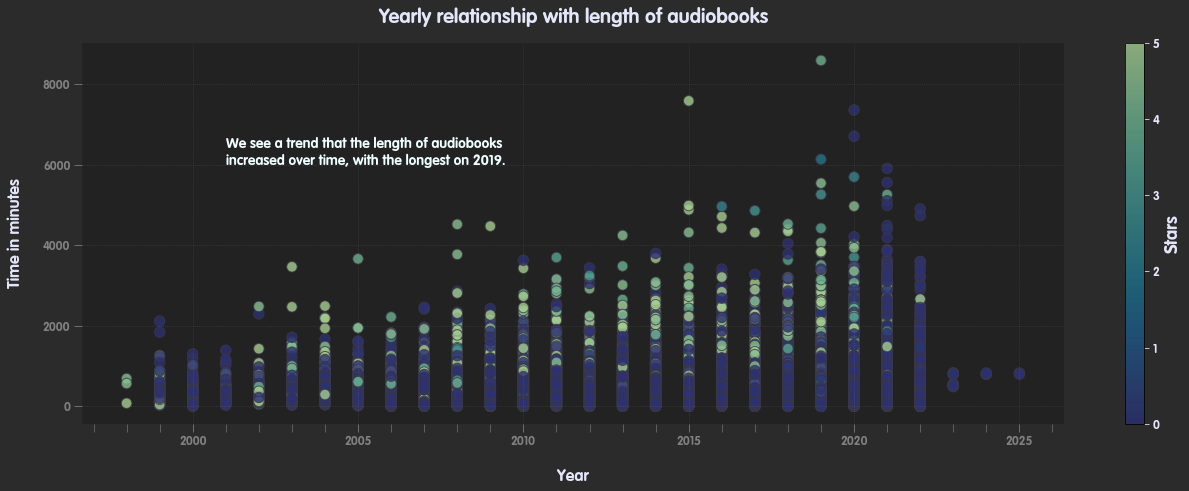

In [21]:
#collapse
fig, ax = plt.subplots(figsize=(22, 7), facecolor='#2b2b2b')
sp = ax.scatter(x=df.year, y=df.time, c=df.stars, cmap='crest_r', edgecolor='#3A3845', s=110, alpha=0.8)

ax.tick_params(axis='x', which='both', colors='gray', size=8)
ax.tick_params(axis='y', colors='gray', size=8)

ax.set_xlabel('Year', fontsize=16, color='lavender',labelpad=20)
ax.set_ylabel('Time in minutes', fontsize=16, color='lavender',labelpad=20)
ax.set_title('Yearly relationship with length of audiobooks', color='lavender', fontsize=20, pad=20)
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.text(x=2001, y=6000, s="We see a trend that the length of audiobooks \nincreased over time, with the longest on 2019.",
        color='azure', size=14)

ax.grid(alpha=0.2, ls=':', which='major')

cb = plt.colorbar(sp)
cb.set_label('Stars', color='lavender', fontsize=18)
cb.ax.yaxis.set_tick_params(color='lavender', size=5)
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='lavender')

plt.show()

#### Heatmap of all co-related columns

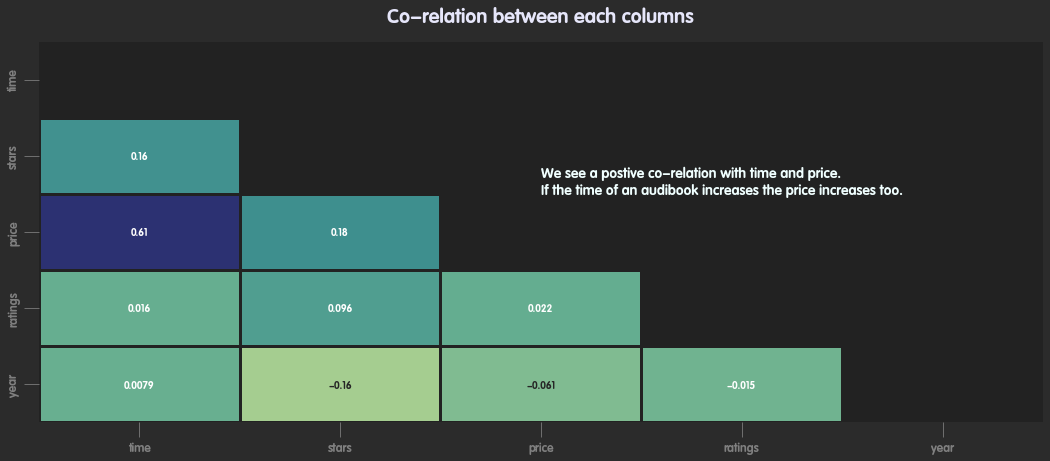

In [22]:
#collapse
co_relation = df.corr()
mapped = np.triu(np.ones_like(co_relation))

fig, ax = plt.subplots(figsize=(18, 7), facecolor='#2b2b2b')
sns.heatmap(co_relation, mask=mapped, annot=True, cmap='crest', linewidths=3, linecolor='#222222', cbar=False)

ax.tick_params(axis='x', colors='gray', size=15)
ax.tick_params(axis='y', colors='gray', size=15)

ax.text(x=2.5, y=2, s="We see a postive co-relation with time and price. \nIf the time of an audibook increases the price increases too.",
        color='azure', size=14)

ax.set_title('Co-relation between each columns', color='lavender', fontsize=20, pad=20)
plt.show()